# Scikit-Learn Tutorial

## Linear Regression

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# make an artifical dataset
x1 = np.arange(10)
np.random.seed(42)
y = (4+3*x1+2*np.random.randn(10))

# sklearn does not like 1D array. Use reshape(-1,1) to reshape it. 
x1 = x1.reshape(-1,1)
y = y.reshape(-1,1)

# define w to store theta values
w=np.zeros((2,1))

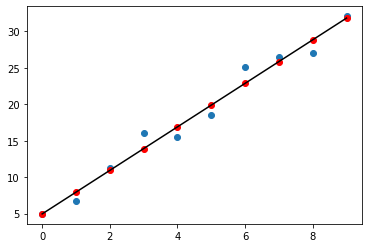

In [2]:
# import sklearn libraries for linear regression
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(x1,y)
w[0,0] = reg.intercept_ # only w0 is intercept
w[1,0] = reg.coef_ # w1 w2 ... wn are all coef

plt.scatter(x1,y)
plt.scatter(x1,reg.predict(x1),c='red')
plt.plot(x1,(w[0,0]+w[1,0]*x1),'k-')

In [3]:
from sklearn.metrics import r2_score, mean_squared_error
H = reg.predict(x1)
print(w, r2_score(H,y),mean_squared_error(H,y))

[[4.95822557]
 [2.98619926]] 0.9744415319654836 1.880296481583228


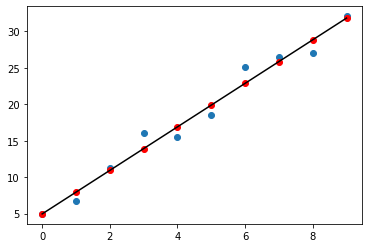

[[4.95822557]
 [2.98619926]] 0.9744415319654836 1.880296481583228


In [4]:
## Linear regression with regularization
# The alpha here is the lambda we talked in the past to address overfitting issue. 
reg1 = linear_model.Ridge(alpha=5)
reg1.fit(x1,y)
w[0,0] = reg.intercept_ # only w0 is intercept
w[1,0] = reg.coef_ # w1 w2 ... wn are all coef

plt.scatter(x1,y)
plt.scatter(x1,reg.predict(x1),c='red')
plt.plot(x1,(w[0,0]+w[1,0]*x1),'k-')
plt.show()

H = reg.predict(x1)
print(w, r2_score(H,y),mean_squared_error(H,y))

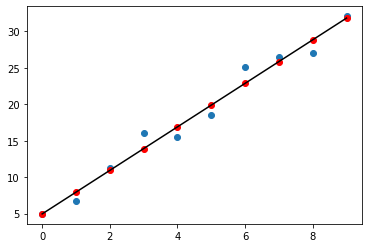

[[4.95822557]
 [2.98619926]] 0.9744415319654836 1.880296481583228 3.169494740869344


In [13]:
# Comparison using data from self-programmed LR model
data = np.loadtxt('data/lin_reg_data.csv', delimiter=',')
x1 = data[:,0].reshape(-1,1)
y = data[:,1].reshape(-1,1)

reg1 = linear_model.Ridge(alpha=5)
reg1.fit(x1,y)
w[0,0] = reg.intercept_ # only w0 is intercept
w[1,0] = reg.coef_ # w1 w2 ... wn are all coef

H = reg.predict(x1)
lam = 5
mse = (np.sum((H-y)**2)+lam*np.sum(w[1:,:]**2))/(2*H.shape[0])

plt.scatter(x1,y)
plt.scatter(x1,H,c='red')
plt.plot(x1,(w[0,0]+w[1,0]*x1),'k-')
plt.show()

H = reg.predict(x1)
print(w, r2_score(H,y),mean_squared_error(H,y),mse)


In [11]:
y.shape

(10, 1)

## Logistic Regression

In [20]:
# use previous data for self-programmed logistic regression
data = np.loadtxt('data/log_reg_data.csv',delimiter=',')
X = data[:,0:2]
Y = data[:,2].reshape(-1,1)
w=np.zeros((3,1))

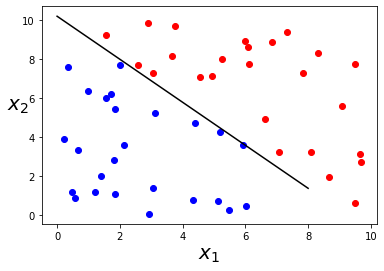

w: [[-13.87713272]
 [  1.50167463]
 [  1.36089934]] cost: 0.5042888484507779 accuracy_score: 1.0 1.0 1.0 1.0


In [22]:
# import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
log_reg = LogisticRegression()
log_reg.fit(X,np.ravel(Y)) # here it does not like reshape(-1,1) for Y. A row vector (50,) is what it is expecting
w[0,0] = log_reg.intercept_
w[1:,0] = log_reg.coef_
H = log_reg.predict(X)
H_proba = log_reg.predict_proba(X)
lam=10
c = -np.sum(Y*np.log(H_proba[:,1].reshape(-1,1))+(1-Y)*np.log(1-H_proba[:,1].reshape(-1,1)))/H_proba[:,1].reshape(-1,1).shape[0]+lam/(2*H_proba[:,1].reshape(-1,1).shape[0])*np.sum(w[1:,:]**2)

x1=X[:,0]
x2=X[:,1]
# divide the x1 and x2 data into 2 groups based on y values for plotting
# count the number the group 1 items which have y value of 1
g0 = []
g1 = []
for i in np.arange(len(Y)):
    if Y[i]==1:
        g1.append(i)
    else:
        g0.append(i)

fig,ax=plt.subplots()
ax.scatter(x1[g1],x2[g1],c='r')
ax.scatter(x1[g0],x2[g0],c='b')
ax.plot(np.arange(int(np.max(x1))),(w[0,0]+w[1,0]*np.arange(int(np.max(x1))))/-w[2,0],'k-')
ax.set_xlabel('$x_1$',fontsize=20)
ax.set_ylabel('$x_2$',rotation=0, fontsize=20)
plt.show()
print('w:',w,'cost:',c, 'accuracy_score:',accuracy_score(H,Y),precision_score(H,Y),recall_score(H,Y),f1_score(H,Y))

## Support Vector Machine (large margin classifier)

$$ \underset{\theta}{min}~C \sum\limits_{i=1}^m[y^{(i)}cost_1(\theta^Tx^{(i)})+(1-y^{(i)}cost_0(\theta^Tx^{(i)}))]+\frac{1}{2}\sum\limits_{i=1}^n\theta_j^2 $$
- if $y=1$, we want $\theta^Tx\geq1$ (not just $\geq0$)
- if $y=0$, we want $\theta^Tx\leq-1$ (not just $<0$)

When using SVM software package (e.g. liblinear, libswm, ...) to solve for parameters $\theta$, need to specify:
- Choice of parameter C
- Choice of kernel (similarity function)

E.g. No kernel ("linear kernel"): Predict $y=1$ if $\theta^Tx\geq0$

Gaussian kernel: 
$$ f_i = exp\left(-\frac{||x-l^{(i)}||^2}{2\sigma^2}\right) $$
where $l^{(i)}=x^{(i)}$. Need to choose $\sigma^2$, which is denoted as 'gamma' in sklearn. It acts like a regularization parameter: 
- if your model is overfitting, you should reduce it
- it it is underfitting, you should increase it

Note: Do perform feature scaling before using the Gaussian kernel. 

rbf_kernel_svm_clf = Pipeline([('scaler', StandardScaler()),("svm_clf",SVC(kernel="rbf", gamma=5, c=0.001)))])

rbf_kernel_svm_clf.fit(X,y)

## Logistic regression vs. SVM
n = number of features ($x \in \mathbb{R^{n+1}}$), m = number of training samples
- if n is large (relative to m):
    - use logistic regression, or SVM without a kernel ("linear kernel")
- if n is small, m is intermediate:
    - use SVM with Gaussian kernel
- if n is small, m is large:
    - create/add more features, then use logistic regression or SVM without a kernel
- Neural network is likely to work well for most of these settings, but may be slower to train. 

Text(0, 0.5, '$x_2$')

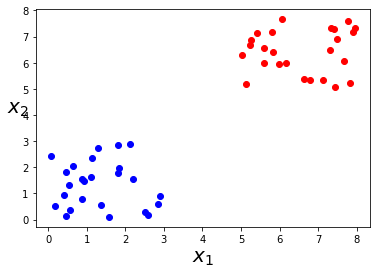

In [23]:
# make an artifical dataset with large margin. 

np.random.seed(42)
x1g0 = 3*np.random.rand(25)
x2g0 = 3*np.random.rand(25)
yg0 = np.zeros(25)

x1g1 = 5+3*np.random.rand(25)
x2g1 = 5+3*np.random.rand(25)
yg1 = np.ones(25)

x1 = np.hstack((x1g0,x1g1)).reshape(-1,1)
x2 = np.hstack((x2g0,x2g1)).reshape(-1,1)
Y = np.hstack((yg0,yg1)).reshape(-1,1)

plt.scatter(x1g1,x2g1,c='r')
plt.scatter(x1g0,x2g0,c='b')
plt.xlabel('$x_1$',fontsize=20)
plt.ylabel('$x_2$',rotation=0, fontsize=20)

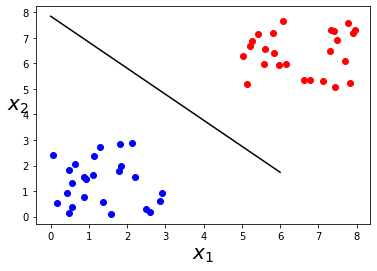

w: [[-7.91131805]
 [ 1.02702147]
 [ 1.00802885]] cost: 0.21770165283243217 accuracy_score: 1.0 1.0 1.0 1.0


In [53]:
# When using logistic regression
X = np.hstack((x1,x2))
log_reg = LogisticRegression()
log_reg.fit(X,np.ravel(Y)) # here it does not like reshape(-1,1) for Y. A row vector (50,) is what it is expecting
w[0,0] = log_reg.intercept_
w[1:,0] = log_reg.coef_
H = log_reg.predict(X)
H_proba = log_reg.predict_proba(X)
lam=10
c = -np.sum(Y*np.log(H_proba[:,1].reshape(-1,1))+(1-Y)*np.log(1-H_proba[:,1].reshape(-1,1)))/H_proba[:,1].reshape(-1,1).shape[0]+lam/(2*H_proba[:,1].reshape(-1,1).shape[0])*np.sum(w[1:,:]**2)

fig,ax=plt.subplots()
ax.scatter(x1g1,x2g1,c='r')
ax.scatter(x1g0,x2g0,c='b')
ax.plot(np.arange(int(np.max(x1))),(w[0,0]+w[1,0]*np.arange(int(np.max(x1))))/-w[2,0],'k-')
ax.set_xlabel('$x_1$',fontsize=20)
ax.set_ylabel('$x_2$',rotation=0, fontsize=20)
plt.show()
print('w:',w,'cost:',c, 'accuracy_score:',accuracy_score(H,Y),precision_score(H,Y),recall_score(H,Y),f1_score(H,Y))

In [54]:
# When using SVM
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

svm_clf = Pipeline([("scaler", StandardScaler()),("linear_svc", LinearSVC(C=1, loss="hinge"))])
svm_clf.fit(X,np.ravel(Y))
H = svm_clf.predict(X)
# Unlike logistic regression classifiers, SVM classifiers do not output probabilities for each class. 

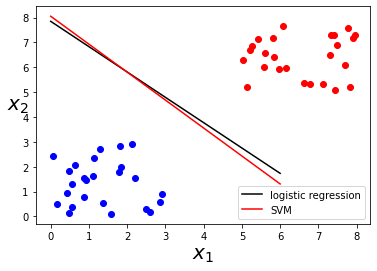

[[0.29054269 0.25848755]] [-2.08163942]


In [56]:
# If not using pipeline and just using the SVM classifier, the theta values can be obtained. 
svm_clf1 = LinearSVC(C=1, loss='hinge', random_state=42)
svm_clf1.fit(X,np.ravel(Y))
#decision_function = np.dot(X,svm_clf1.coef_[0]+svm_clf1.intercept_)
#decision_function
w1=np.zeros((3,1))
w1[0,0] = svm_clf1.intercept_
w1[1:,0] = svm_clf1.coef_

fig,ax=plt.subplots()
ax.scatter(x1g1,x2g1,c='r')
ax.scatter(x1g0,x2g0,c='b')
ax.plot(np.arange(int(np.max(x1))),(w[0,0]+w[1,0]*np.arange(int(np.max(x1))))/-w[2,0],'k-',label='logistic regression')
ax.plot(np.arange(int(np.max(x1))),(w1[0,0]+w1[1,0]*np.arange(int(np.max(x1))))/-w1[2,0],'r-',label='SVM')
ax.plot()
ax.set_xlabel('$x_1$',fontsize=20)
ax.set_ylabel('$x_2$',rotation=0, fontsize=20)
plt.legend()
plt.show()

print(svm_clf1.coef_, svm_clf1.intercept_)

[[0.29054269 0.25848755]] [-2.08163942]
